In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv('E:\\Meachine Learning Datasets\\Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
real_x = data.iloc[:,[2,3]].values
real_y = data.iloc[:,4].values

In [4]:
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y,test_size = 0.25, random_state = 0)

In [5]:
#Feature Scaling
scaler = StandardScaler()
training_x = scaler.fit_transform(training_x)
test_x = scaler.fit_transform(test_x)

In [6]:
#Classifier 

classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p = 2)
classifier.fit(training_x,training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(test_x)

In [8]:
confusion_M = confusion_matrix(test_y,y_pred)
confusion_M

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


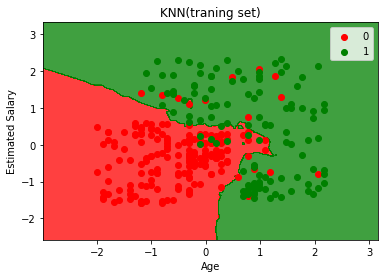

In [9]:
x_set,y_set = training_x,training_y
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                alpha = 0.75, cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i),label = j)
    plt.title('KNN(traning set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


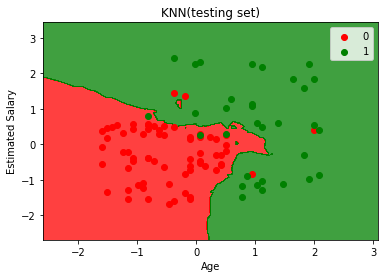

In [10]:
x_set,y_set = test_x,test_y
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                alpha = 0.75, cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i),label = j)
    plt.title('KNN(testing set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
